In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

prepraing data

In [ ]:
train_path = '/content/drive/MyDrive/archive (1)/Multi-class Weather Dataset'
test_path = '/content/drive/MyDrive/archive (1)/validation'

In [ ]:
print(train_path)

/content/drive/MyDrive/archive (1)/Multi-class Weather Dataset


Sunrise


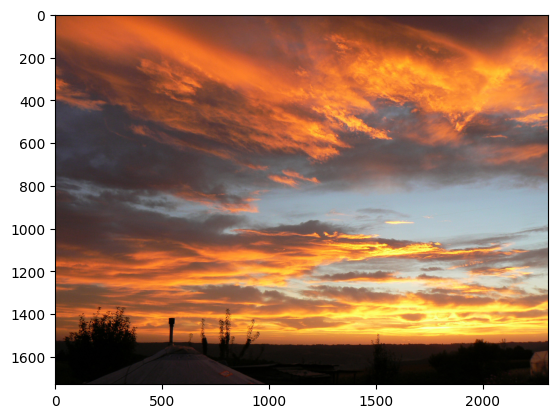

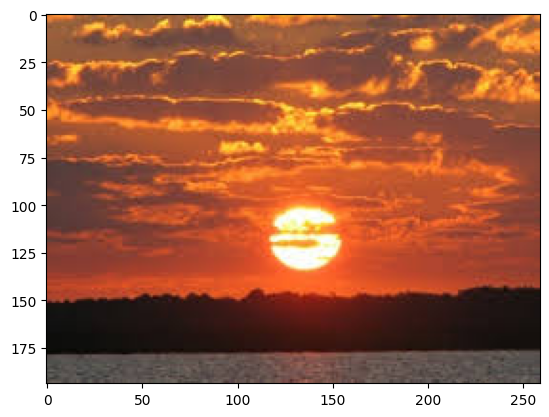

Cloudy


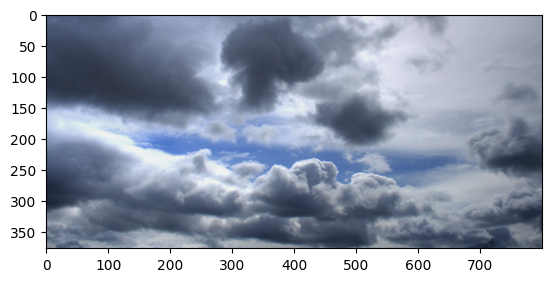

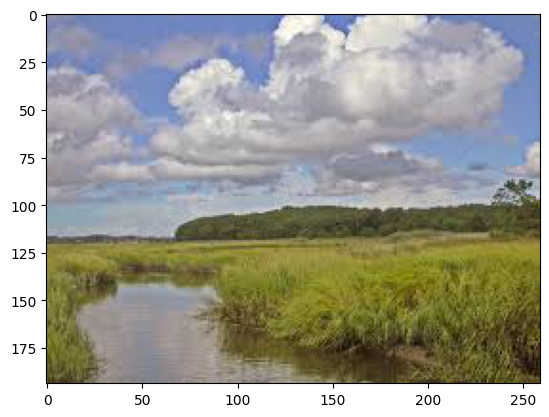

Shine


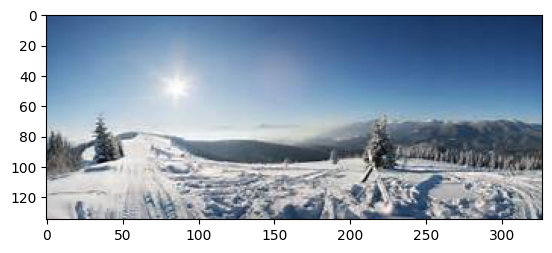

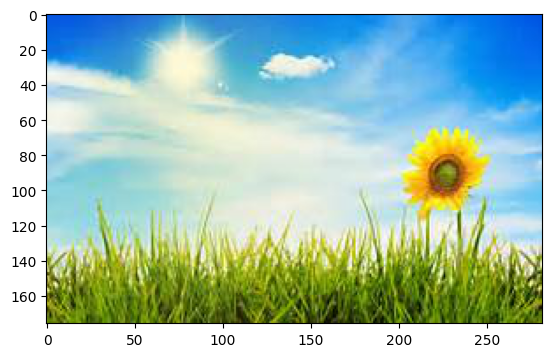

Rain


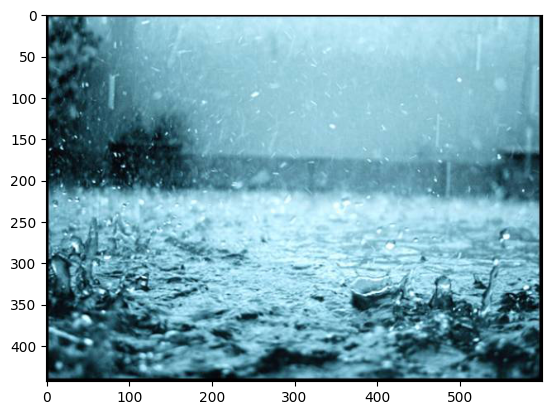

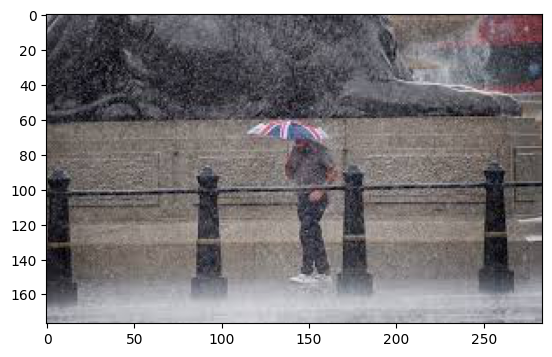

In [ ]:
import matplotlib.image as mpimg
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder

    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  # validation_split=0.2,
  # subset="training",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1004 files belonging to 4 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  # validation_split=0.2,
  # subset="validation",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 140 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


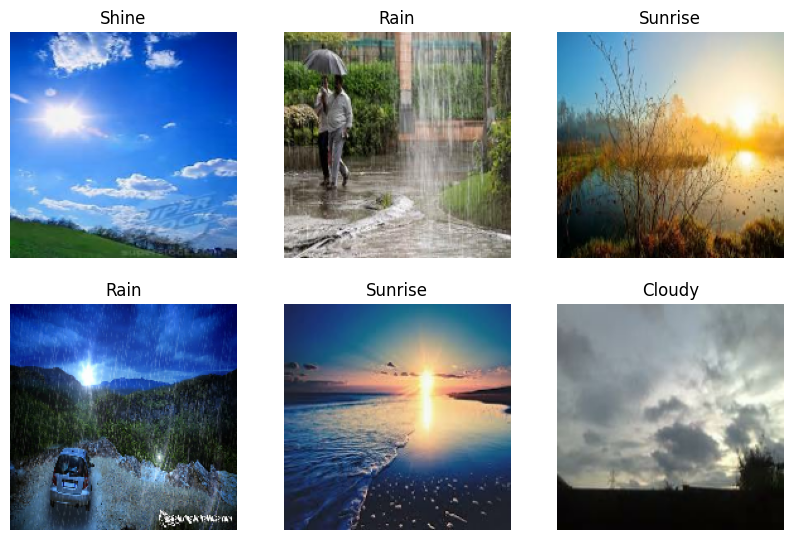

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [ ]:
# resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
epochs=4
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  steps_per_epoch=8
)

Epoch 1/4
8/8 [==============================] - 60s 8s/step - loss: 0.0309 - accuracy: 0.9883 - val_loss: 0.1744 - val_accuracy: 0.9429
Epoch 2/4
8/8 [==============================] - 79s 11s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 0.9357
Epoch 3/4
8/8 [==============================] - 59s 8s/step - loss: 0.0311 - accuracy: 0.9883 - val_loss: 0.1551 - val_accuracy: 0.9500
Epoch 4/4
8/8 [==============================] - 74s 10s/step - loss: 0.0187 - accuracy: 0.9958 - val_loss: 0.1797 - val_accuracy: 0.9500


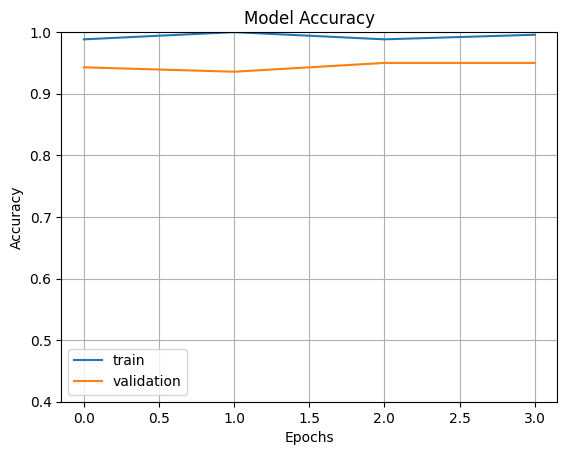

In [ ]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

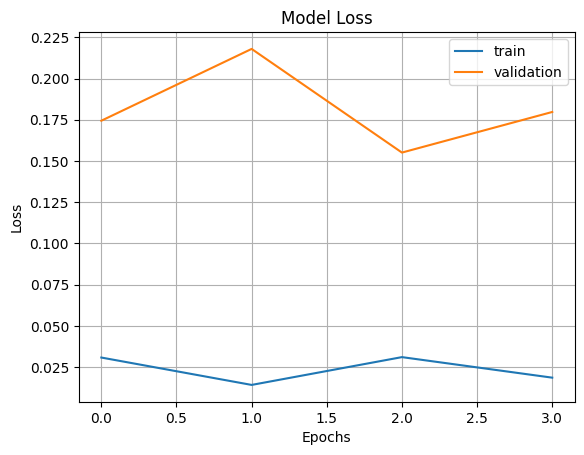

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [ ]:

import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/shine161.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


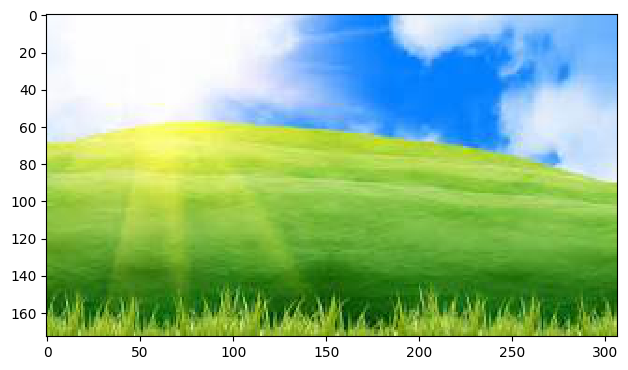

In [ ]:
from skimage import io
#image of shine weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/shine161.jpg")
io.imshow(img)

In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 278ms/step
[[5.3361838e-04 9.7019672e-03 9.6329957e-01 2.6464636e-02 2.4855856e-07]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

The predicted image is Shine


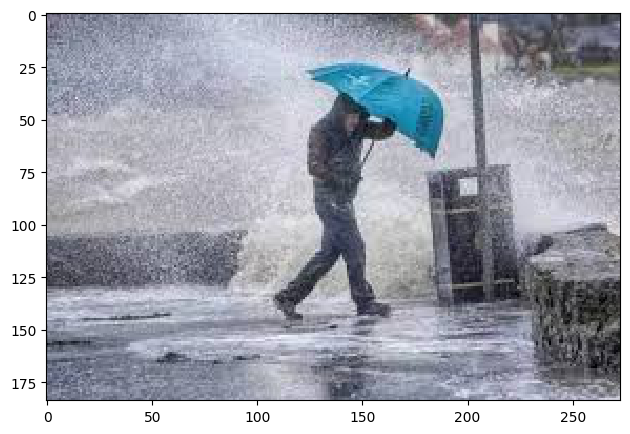

In [ ]:
from skimage import io
#image of rain weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/rain168.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/rain168.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 289ms/step
[[7.1391693e-09 1.0000000e+00 9.0207113e-09 9.1753792e-12 7.8991704e-14]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

The predicted image is Rain


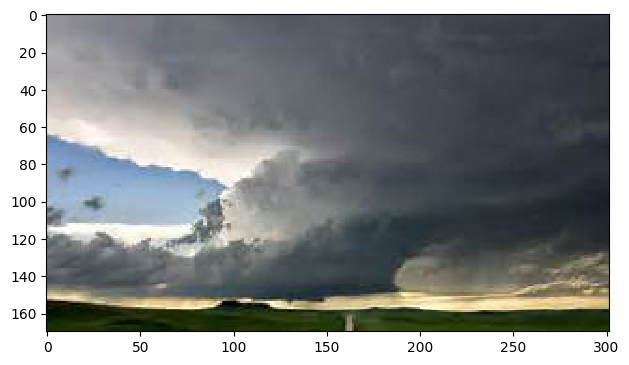

In [ ]:
from skimage import io
#image of cloudy weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/cloudy183.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/cloudy183.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 170ms/step
The predicted image is Cloudy


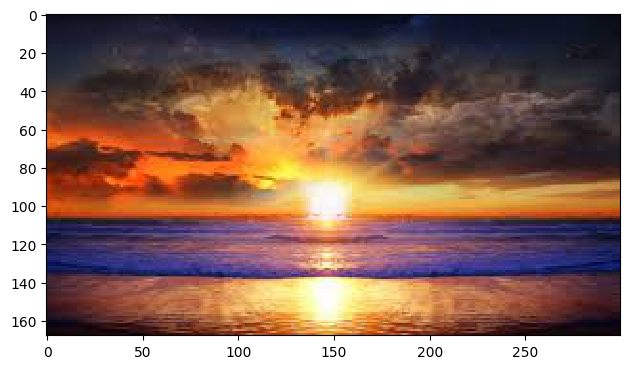

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/sunrise173.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/sunrise173.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 183ms/step
The predicted image is Sunrise


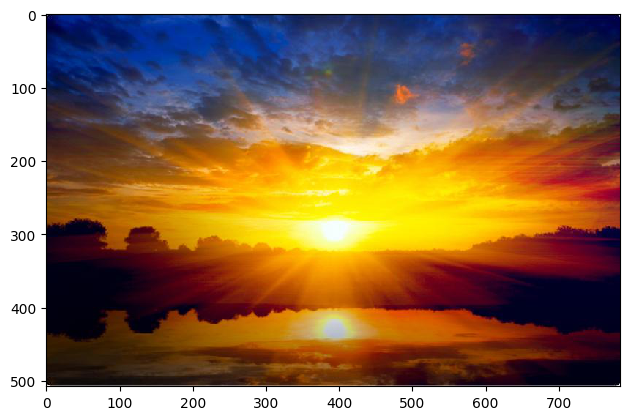

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/drive/MyDrive/archive (1)/New/sunrise172.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/archive (1)/New/sunrise175.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 153ms/step
The predicted image is Sunrise


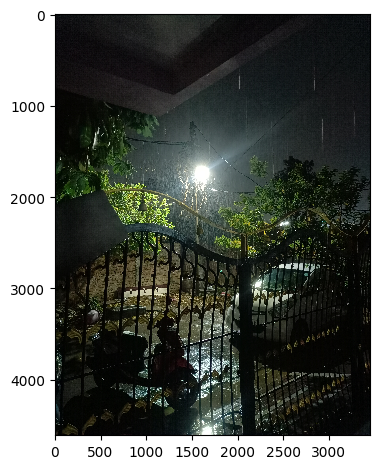

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/IMG20230422185826.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/IMG20230422185826.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 165ms/step
The predicted image is Rain


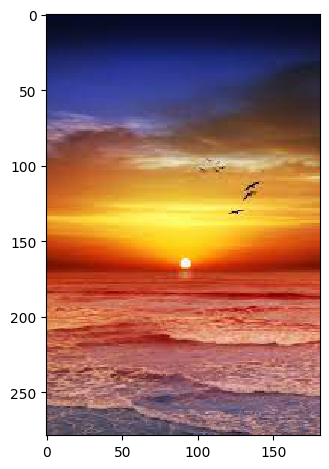

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/download (2).jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/download (2).jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 183ms/step
The predicted image is Sunrise


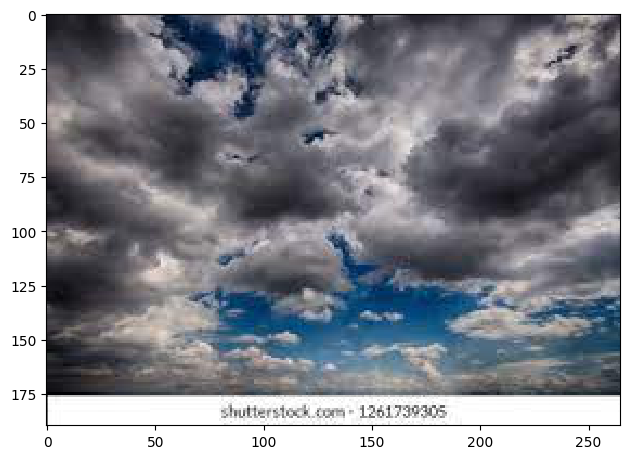

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/download.jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/download.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 161ms/step
The predicted image is Cloudy


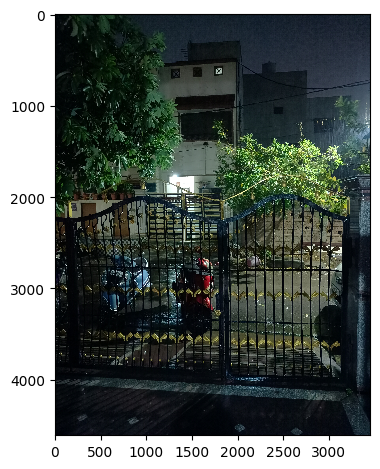

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/IMG20230422185802.jpg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/IMG20230422185607.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 295ms/step
The predicted image is Cloudy


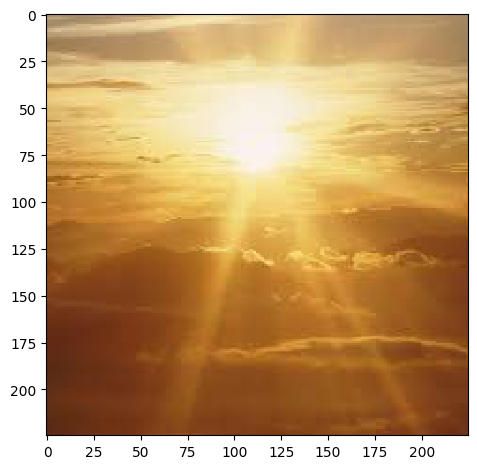

In [ ]:
from skimage import io
#image of sunrise weather
img = io.imread("/content/shine.jpeg")
io.imshow(img)

In [ ]:
import cv2
image=cv2.imread("/content/shine.jpeg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)
pred=resnet_model.predict(image)
# print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted image is", output_class)

1/1 [==============================] - 0s 277ms/step
The predicted image is Shine
